In [1]:
import matplotlib.pyplot as plt
# Descriptive Plots - Boxplot, Density etc.
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
ir_data=pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/iris.csv")

In [5]:
ir_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
ir_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Figure size 1224x648 with 0 Axes>

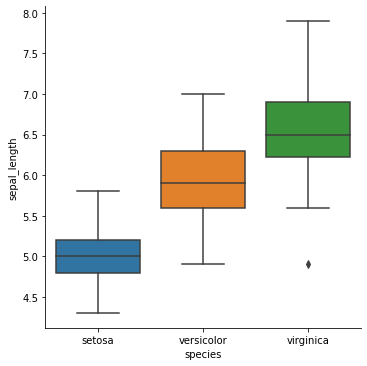

In [19]:
plt.figure(figsize=(17,9))
sns.catplot(y='sepal_length',data=ir_data,x='species',kind='box')

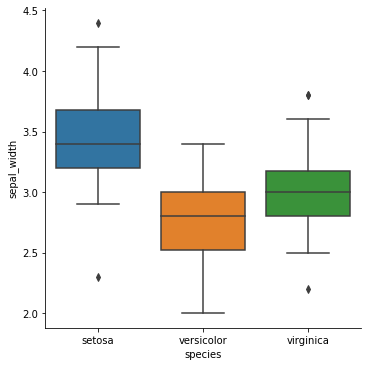

In [20]:
sns.catplot(y='sepal_width',data=ir_data,x='species',kind='box')

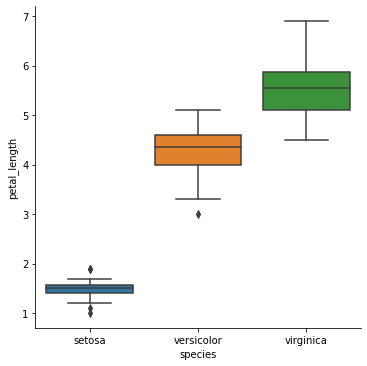

In [21]:
sns.catplot(y='petal_length',data=ir_data,x='species',kind='box')

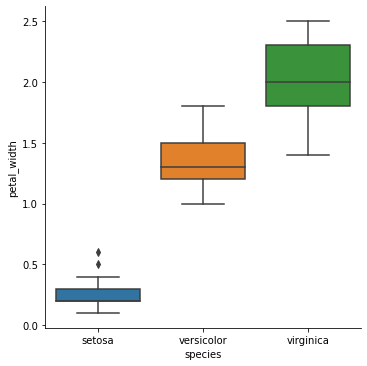

In [22]:
sns.catplot(y='petal_width',data=ir_data,x='species',kind='box')

In [23]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
ir_data['species']=enc.fit_transform(ir_data['species'])

In [24]:
ir_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
ir_data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

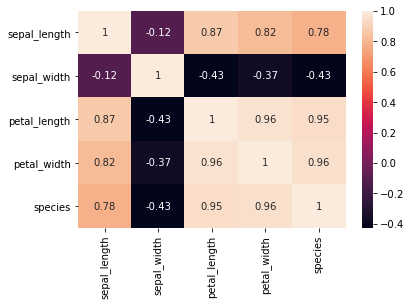

In [27]:
sns.heatmap(ir_data.corr('pearson'), annot=True)

In [73]:
x=ir_data.drop(['petal_width','petal_length','species'],axis=1)
y=ir_data['species']

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [75]:
from sklearn.linear_model import LogisticRegression
ir_model=LogisticRegression(C=1e6,max_iter=1e9,solver='saga',random_state=3)
ir_model.fit(x_train,y_train)

LogisticRegression(C=1000000.0, max_iter=1000000000.0, random_state=3,
                   solver='saga')

In [76]:
ir_model.score(x_test,y_test)

0.9333333333333333

In [77]:
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
predicted=ir_model.predict(x_test)
predicted

array([2, 1, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       2, 0, 2, 1, 0, 2, 0, 2])

In [79]:
confusion_matrix(y_test,predicted)

array([[13,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  7]], dtype=int64)

<AxesSubplot:>

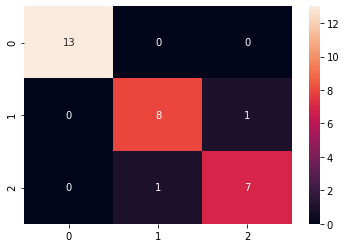

In [81]:
sns.heatmap(confusion_matrix(y_test,predicted),annot=True)

In [85]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      0.89      0.89         9
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

